In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
df = pd.read_csv("Car_clean_data.csv")
df.head()

,Brand,Date,District,Engine_capacity,Engine_power,From_who,Fuel_type,Gear_type,Kilometer,Model,Model_year,Price,Title,Variant
0,Chrysler,27/12/2020,Beylikdüzü/Beylikdüzü,2501-3000 cc,Bilmiyorum,Galeriden,Dizel,Otomatik Vites,221000,300 C,2009,215000,2009 CHRYSLER 300C 3.0 CRD 218 HP 221 BİN KM ...,3.0 CRD
1,Dodge,03/12/2020,Büyükçekmece/Büyükçekmece,2501-3000 cc,Bilmiyorum,Galeriden,Dizel,Otomatik Vites,213000,Nitro,2008,172000,2008 DODGE NİTRO 2.8 CRD SXT 4x4 DERi SUNROOF ...,2.8 CRD SXT
2,Fiat,19/02/2021,Altındağ/Altındağ,1300 cc ve altı,100 BG ve altı,Galeriden,Dizel,Düz Vites,172600,Linea,2014,87700,OTTOHAN DAN 2014 FİAT LİNEA 1.3 MULTİJET POP D...,1.3 Multijet Pop
3,Alfa Romeo,24/01/2021,Seyhan/Yeşiloba,1801-2000 cc,Bilmiyorum,Galeriden,Benzin,Otomatik Vites,13000,Stelvio,2018,875000,2018 STELVİO KIRMIZI DERİ ŞERİT TAKİP DNA SÜRÜ...,Diğer
4,BMW,15/02/2021,Esenyurt/Merkez,1301-1600 cc,Bilmiyorum,Galeriden,Benzin,Yarı Otomatik Vites,108000,3 Serisi,2016,359950,2016 BMW 320İ ED M PLUS 108.000 KM DE SERVİS B...,320i ED M Plus


In [348]:
df.shape

(19476, 14)

In [349]:
df.describe()

,Kilometer,Model_year,Price
count,1.947600e+04,19476.000000,1.947600e+04
mean,1.297973e+05,2012.432532,2.603797e+05
std,9.458190e+04,6.716448,4.120676e+05
min,0.000000e+00,1954.000000,1.100000e+01
25%,6.200000e+04,2010.000000,1.050000e+05
50%,1.160000e+05,2014.000000,1.569000e+05
75%,1.852862e+05,2017.000000,2.590000e+05
max,2.101065e+06,2021.000000,7.500000e+06


minimum maksimum kilometre ve fiyatta mantıksızlık var,
There are problems min max Kilometer and Price

In [350]:
df.Price.min()

11

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19476 entries, 0 to 19475
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            19476 non-null  object
 1   Date             19476 non-null  object
 2   District         18527 non-null  object
 3   Engine_capacity  19476 non-null  object
 4   Engine_power     19476 non-null  object
 5   From_who         19476 non-null  object
 6   Fuel_type        19476 non-null  object
 7   Gear_type        19476 non-null  object
 8   Kilometer        19476 non-null  int64 
 9   Model            19476 non-null  object
 10  Model_year       19476 non-null  int64 
 11  Price            19476 non-null  int64 
 12  Title            19476 non-null  object
 13  Variant          19476 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.1+ MB


In [352]:
df.isna().sum()

Brand                0
Date                 0
District           949
Engine_capacity      0
Engine_power         0
From_who             0
Fuel_type            0
Gear_type            0
Kilometer            0
Model                0
Model_year           0
Price                0
Title                0
Variant              0
dtype: int64

In [353]:
df.drop(labels=["Title","Variant","Model","District","Date","Engine_power","From_who"],axis=1,inplace=True)

Tahminde kullanılmayacak kolonlar atılır. Columns that will not be used in the prediction are discarded

In [354]:
df.Engine_capacity.value_counts()

1301-1600 cc        12299
1300 cc ve altı      3005
1801-2000 cc         1993
2501-3000 cc          723
1601-1800 cc          542
2001-2500 cc          511
Bilmiyorum            139
3501-4000 cc           89
3001-3500 cc           52
4501-5000 cc           34
5501-6000 cc           28
4001-4500 cc           28
6001 cc ve üzeri       20
5001-5500 cc           13
Name: Engine_capacity, dtype: int64

In [355]:
Bilmiyorum_index = df[df["Engine_capacity"] == "Bilmiyorum"].index
Bilmiyorum_index

Int64Index([  139,   193,   402,   432,   453,   454,   857,  1179,  1196,
             1255,
            ...
            18420, 18653, 18813, 19029, 19060, 19086, 19296, 19317, 19337,
            19396],
           dtype='int64', length=139)

In [356]:
df.drop(index=Bilmiyorum_index,inplace=True)

In [357]:
df.Fuel_type.value_counts()

Dizel         11106
Benzin         4378
Benzin/LPG     3642
Hibrit          129
Elektrik         82
Name: Fuel_type, dtype: int64

In [358]:
elektrik_hibrit_index = df[(df.Fuel_type=="Elektrik") | (df.Fuel_type=="Hibrit")].index
df.drop(index=elektrik_hibrit_index,inplace=True)

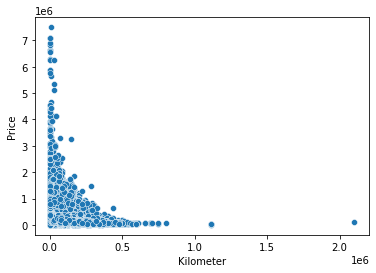

In [359]:
sns.scatterplot(x="Kilometer",y="Price",data=df)
plt.show()

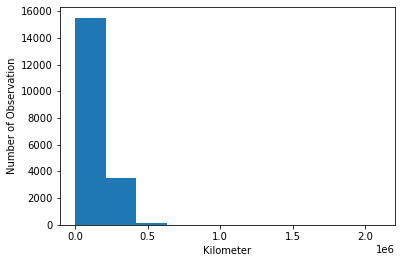

In [360]:
fig, ax = plt.subplots()
ax.hist(df.Kilometer, label = "Kilometer", bins=10)
ax.set_xlabel("Kilometer")
ax.set_ylabel("Number of Observation")
plt.show()

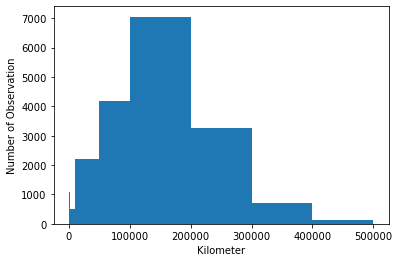

In [361]:
bins = [0,1000,10000,50000,100000,200000,300000,400000,500000]
fig, ax = plt.subplots()
ax.hist(df.Kilometer, label = "Kilometer", bins=bins)
ax.set_xlabel("Kilometer")
ax.set_ylabel("Number of Observation")
plt.show()

300.000 km'den sonrasını atıyoruz.We will discard data greater than 300,000 km

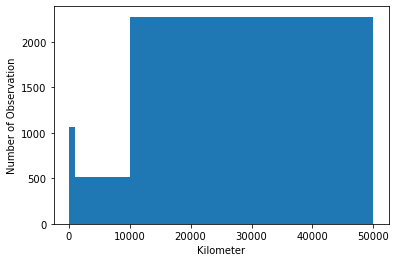

In [362]:
bins = [0,1000,10000,50000]
fig, ax = plt.subplots()
ax.hist(df.Kilometer, label = "Kilometer", bins=bins)
ax.set_xlabel("Kilometer")
ax.set_ylabel("Number of Observation")
plt.show()

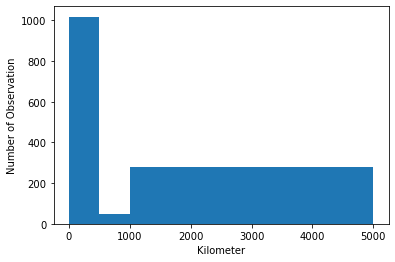

In [363]:
bins = [0,500,1000,5000]
fig, ax = plt.subplots()
ax.hist(df.Kilometer, label = "Kilometer", bins=bins)
ax.set_xlabel("Kilometer")
ax.set_ylabel("Number of Observation")
plt.show()

10.000 km'den az olanları atıyoruz.We will discard data less than 10,000 km

In [364]:
len(df[df.Kilometer <10000])

1581

In [365]:
len(df[df.Kilometer >300000])

825

In [366]:
index_numbers = df[(df.Kilometer < 10000) | (df.Kilometer >300000)].index
df2 = df.drop(index=index_numbers)

In [367]:
df2.shape

(16720, 7)

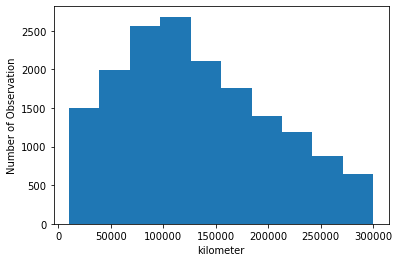

In [368]:
fig, ax = plt.subplots()
ax.hist(df2.Kilometer, label = "Kilometer", bins=10)
ax.set_xlabel("kilometer")
ax.set_ylabel("Number of Observation")
plt.show()

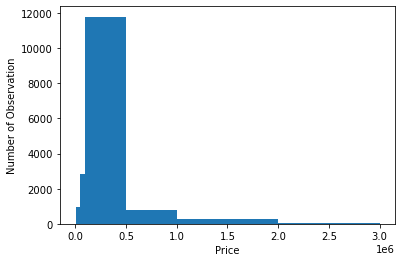

In [369]:
bins = [0,500,1000,5000,10000,50000,100000,500000,1000000,2000000,3000000]
fig, ax = plt.subplots()
ax.hist(df2.Price, label = "Price", bins=bins)
ax.set_xlabel("Price")
ax.set_ylabel("Number of Observation")
plt.show()

500.000 TL üstünü atıyoruz.Discard beyond 500.000

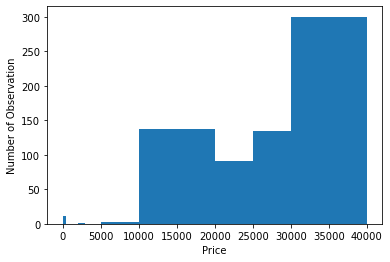

In [370]:
bins = [0,10,50,100,500,1000,1500,2000,3000,5000,10000,20000,25000,30000,40000]
fig, ax = plt.subplots()
ax.hist(df2.Price, label = "Price", bins=bins)
ax.set_xlabel("Price")
ax.set_ylabel("Number of Observation")
plt.show()

30.000 TL altını atıyoruz.Discard before 30.000

In [371]:
index_numbers = df2[(df2.Price < 30000) | (df2.Price >500000)].index
df3 = df2.drop(index=index_numbers)

In [372]:
df3.shape

(15235, 7)

In [373]:
df3.columns

Index(['Brand', 'Engine_capacity', 'Fuel_type', 'Gear_type', 'Kilometer',
       'Model_year', 'Price'],
      dtype='object')

In [374]:
df3.head()

,Brand,Engine_capacity,Fuel_type,Gear_type,Kilometer,Model_year,Price
0,Chrysler,2501-3000 cc,Dizel,Otomatik Vites,221000,2009,215000
1,Dodge,2501-3000 cc,Dizel,Otomatik Vites,213000,2008,172000
2,Fiat,1300 cc ve altı,Dizel,Düz Vites,172600,2014,87700
4,BMW,1301-1600 cc,Benzin,Yarı Otomatik Vites,108000,2016,359950
5,BMW,1801-2000 cc,Dizel,Otomatik Vites,255000,2010,209900


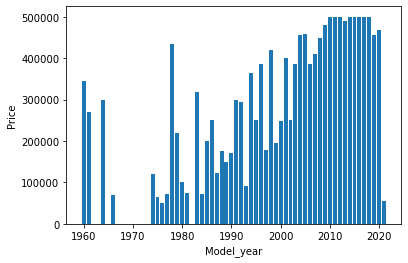

<Figure size 4000x4000 with 0 Axes>

In [375]:
fig,ax = plt.subplots()
ax.bar(df3.Model_year,df3.Price)
ax.set_xlabel("Model_year")
ax.set_ylabel("Price")
plt.figure(figsize=(10,10),dpi=400)
plt.show()

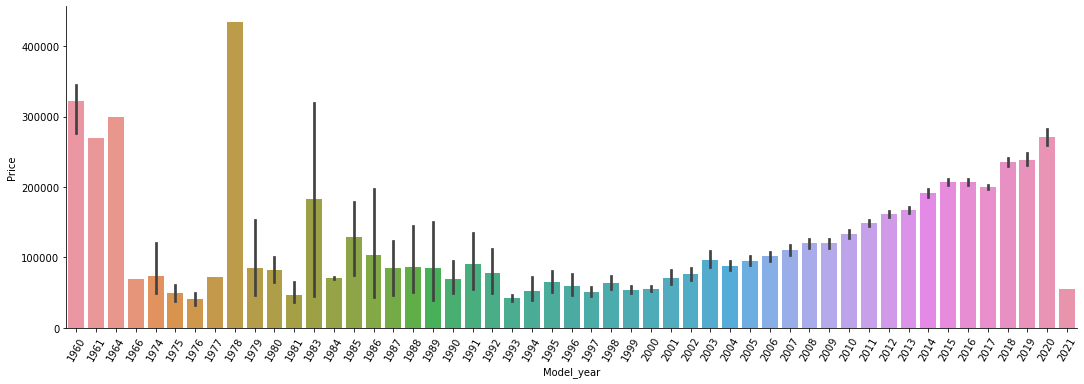

In [376]:
sns.catplot(x="Model_year",y="Price",data=df3,kind="bar",aspect=3)
plt.xticks(rotation=60)
plt.show()

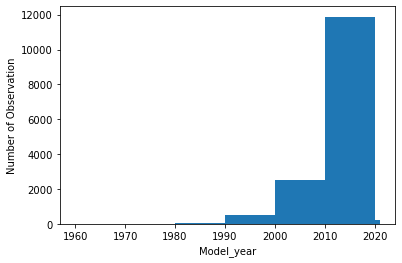

In [377]:
fig,ax= plt.subplots()
ax.hist(df3.Model_year,label="Model_year",bins=[1960,1970,1980,1990,2000,2010,2020,2021])
ax.set_xlabel("Model_year")
ax.set_ylabel("Number of Observation")
plt.show()

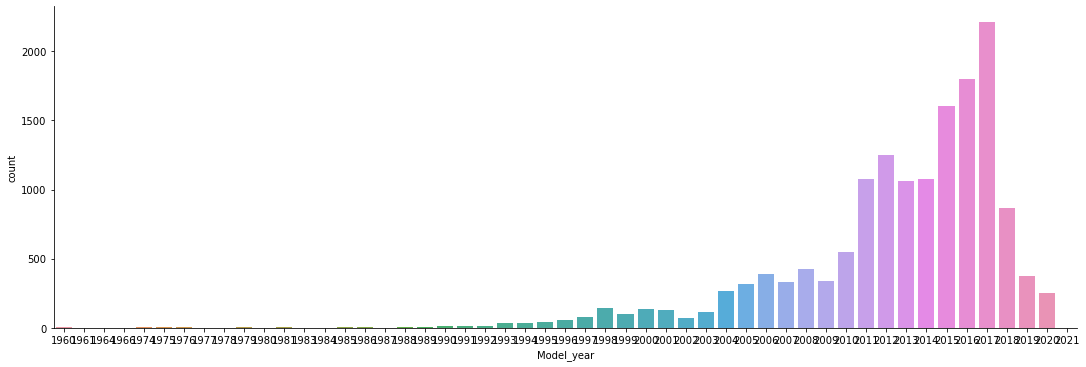

In [378]:
sns.catplot(x="Model_year",data=df3,aspect=3,kind="count")
plt.show()

In [379]:
index_numbers = df3[(df3["Model_year"] < 2000) | (df3["Model_year"] == 2021) ].index
df4 = df3.drop(index=index_numbers)

Discard before 2000 and 2021

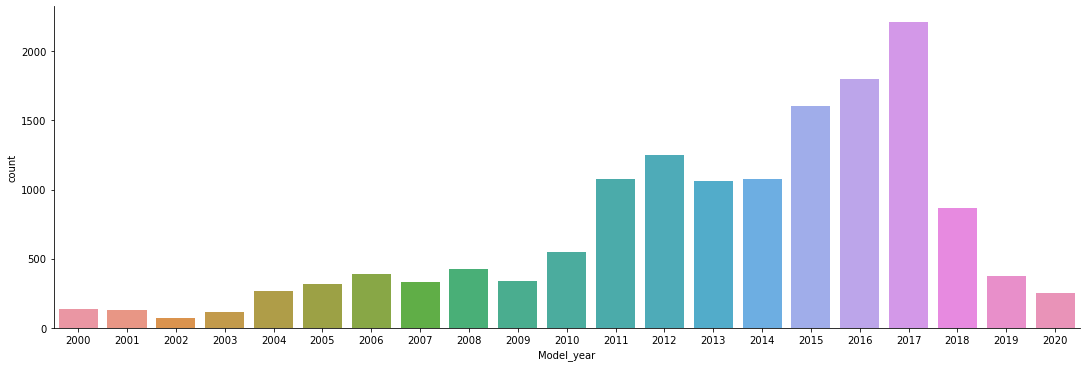

In [380]:
sns.catplot(x="Model_year",data=df4,aspect=3,kind="count")
plt.show()

In [381]:
df4.describe()

,Kilometer,Model_year,Price
count,14653.000000,14653.000000,14653.000000
mean,131511.407971,2013.232307,176427.155054
std,70590.700677,4.275597,94217.440929
min,10000.000000,2000.000000,30500.000000
25%,77000.000000,2011.000000,111500.000000
50%,123000.000000,2014.000000,150000.000000
75%,180000.000000,2017.000000,222000.000000
max,300000.000000,2020.000000,500000.000000


In [382]:
df4.Brand.value_counts()

Volkswagen    892
Hyundai       882
Ford          877
Peugeot       859
Opel          836
Citroen       824
Renault       817
Fiat          794
Toyota        748
Skoda         708
Audi          682
Nissan        680
BMW           662
Honda         646
Dacia         625
Seat          583
Mercedes      523
Kia           471
Chevrolet     366
Volvo         195
Mini          162
Land Rover    159
Mitsubishi    145
Jeep           81
Suzuki         79
Mazda          62
Alfa Romeo     51
Diğer          43
Isuzu          38
Tofaş          23
Jaguar         22
Tata           18
Porsche        17
Subaru         16
Chrysler       13
Dodge          13
Acura          12
Chery          11
Smart           7
Lada            6
Ssangyong       5
Name: Brand, dtype: int64

Discard before 500

In [383]:
Brands = df.Brand.value_counts() <500

In [384]:
Brands = df4.Brand.value_counts().index

In [385]:
Brands

Index(['Volkswagen', 'Hyundai', 'Ford', 'Peugeot', 'Opel', 'Citroen',
       'Renault', 'Fiat', 'Toyota', 'Skoda', 'Audi', 'Nissan', 'BMW', 'Honda',
       'Dacia', 'Seat', 'Mercedes', 'Kia', 'Chevrolet', 'Volvo', 'Mini',
       'Land Rover', 'Mitsubishi', 'Jeep', 'Suzuki', 'Mazda', 'Alfa Romeo',
       'Diğer', 'Isuzu', 'Tofaş', 'Jaguar', 'Tata', 'Porsche', 'Subaru',
       'Chrysler', 'Dodge', 'Acura', 'Chery', 'Smart', 'Lada', 'Ssangyong'],
      dtype='object')

In [386]:
len(Brands)

41

In [387]:
Discard =Brands[17:]

In [388]:
Discard

Index(['Kia', 'Chevrolet', 'Volvo', 'Mini', 'Land Rover', 'Mitsubishi', 'Jeep',
       'Suzuki', 'Mazda', 'Alfa Romeo', 'Diğer', 'Isuzu', 'Tofaş', 'Jaguar',
       'Tata', 'Porsche', 'Subaru', 'Chrysler', 'Dodge', 'Acura', 'Chery',
       'Smart', 'Lada', 'Ssangyong'],
      dtype='object')

In [389]:
len(Discard)

24

In [390]:
f = lambda x: df4[df4['Brand']== x].index
index_numbers = [f(x) for x in Discard]
for i in index_numbers:
    df4.drop(index=i,inplace=True)

In [391]:
df4.Brand.value_counts()

Volkswagen    892
Hyundai       882
Ford          877
Peugeot       859
Opel          836
Citroen       824
Renault       817
Fiat          794
Toyota        748
Skoda         708
Audi          682
Nissan        680
BMW           662
Honda         646
Dacia         625
Seat          583
Mercedes      523
Name: Brand, dtype: int64

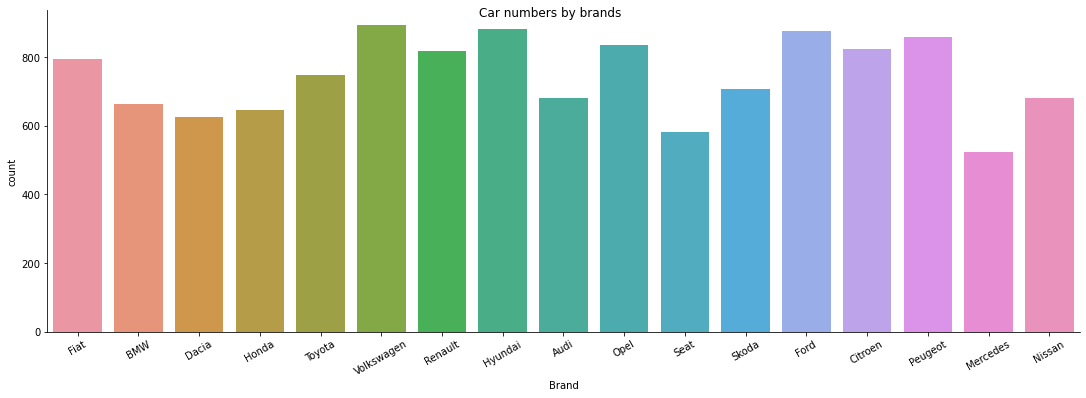

In [392]:
g = sns.catplot(x="Brand",data=df4,aspect=3,kind="count")
g.fig.suptitle("Car numbers by brands")
plt.xticks(rotation=30)
plt.show()

# Outliear Detection

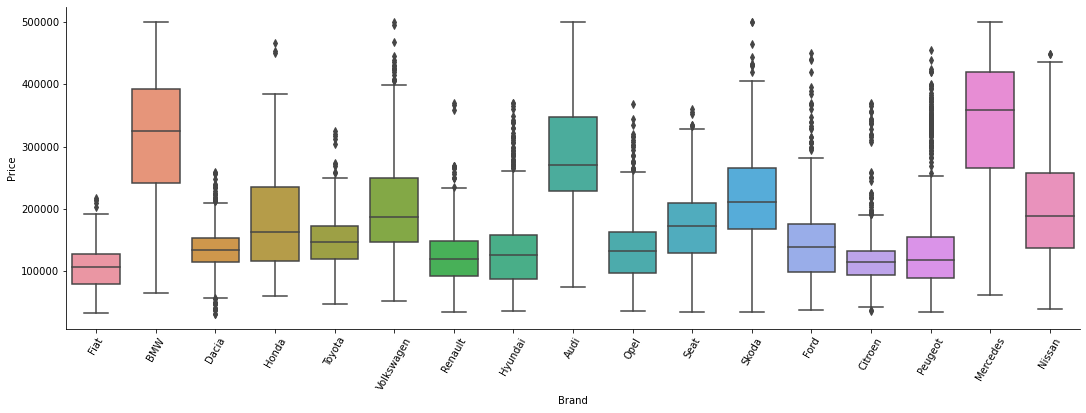

In [393]:
sns.catplot(x="Brand",y="Price",data=df4,kind="box",aspect=3)
plt.xticks(rotation=60)
plt.show()

In [394]:
selected = df4[df4["Brand"] =="Peugeot"]
selected_col = selected["Price"]
std = selected_col.std()
avg = selected_col.mean()
three_sigma_plus =avg + (3 * std)
three_sigma_minus = avg - (3 * std)

In [395]:
selected[((selected["Price"] > three_sigma_plus) | (selected["Price"] < three_sigma_minus))].index

Int64Index([18588, 18609, 18610, 18723, 18933, 18964, 19038, 19144, 19151,
            19248, 19268, 19362],
           dtype='int64')

In [396]:
df4["Brand"].unique()

array(['Fiat', 'BMW', 'Dacia', 'Honda', 'Toyota', 'Volkswagen', 'Renault',
       'Hyundai', 'Audi', 'Opel', 'Seat', 'Skoda', 'Ford', 'Citroen',
       'Peugeot', 'Mercedes', 'Nissan'], dtype=object)

3 Sigma Method 

In [397]:
for spec in df4["Brand"].unique():
    #print(spec)
    selected = df4[df4["Brand"] ==spec]
    selected_col = selected["Price"]
    std = selected_col.std()
    avg = selected_col.mean()
    three_sigma_plus =avg + (3 * std)
    three_sigma_minus = avg - (3 * std)
    discard =selected[((selected["Price"] > three_sigma_plus) | (selected["Price"] < three_sigma_minus))].index
    df4.drop(index=discard,inplace=True)
    
    

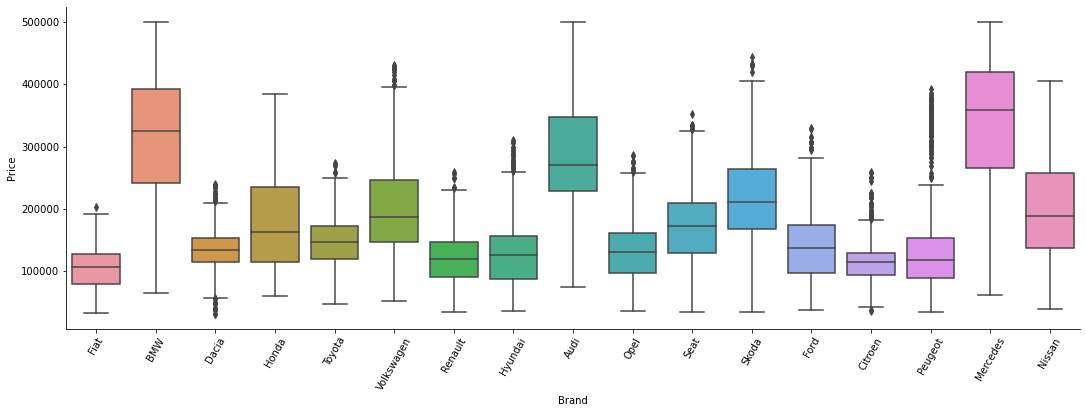

In [398]:
sns.catplot(x="Brand",y="Price",data=df4,kind="box",aspect=3)
plt.xticks(rotation=60)
plt.show()

Quantile Method

In [399]:
for spec in df4["Brand"].unique():
    #print(spec)
    selected = df4[df4["Brand"] ==spec]
    selected_col = selected["Price"]
    
    q1 = selected_col.quantile(0.25)
    q3 = selected_col.quantile(0.75)
    
    iqr = q3 - q1
    
    minimum = q1 - (1.5 * iqr)
    maximum = q3 + (1.5 * iqr)
    
    discard =selected[((selected["Price"] > maximum) | (selected["Price"] < minimum))].index
    df4.drop(index=discard,inplace=True)
    
    

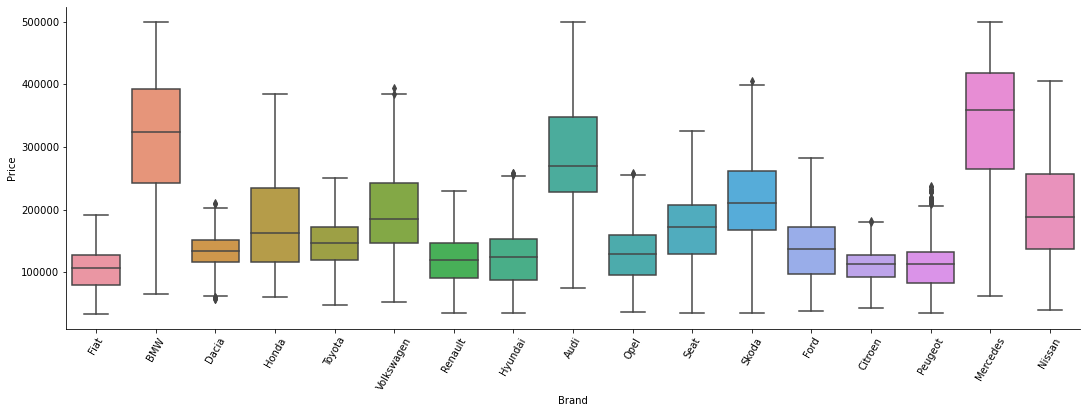

In [400]:
sns.catplot(x="Brand",y="Price",data=df4,kind="box",aspect=3)
plt.xticks(rotation=60)
plt.show()

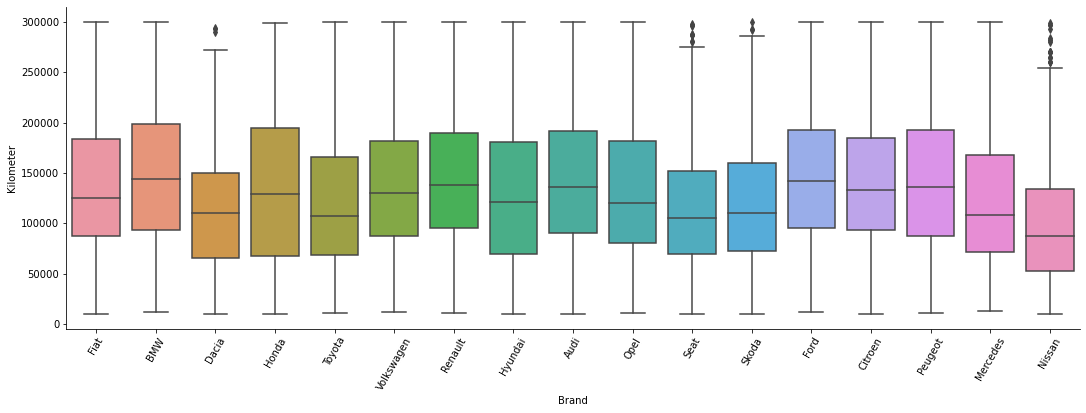

In [401]:
sns.catplot(x="Brand",y="Kilometer",data=df4,kind="box",aspect=3)
plt.xticks(rotation=60)
plt.show()

In [402]:
dfec = pd.get_dummies(df4["Engine_capacity"])

In [403]:
dfec

,1300 cc ve altı,1301-1600 cc,1601-1800 cc,1801-2000 cc,2001-2500 cc,2501-3000 cc,3001-3500 cc,3501-4000 cc,4001-4500 cc,4501-5000 cc,6001 cc ve üzeri
2,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19468,0,0,1,0,0,0,0,0,0,0,0
19470,1,0,0,0,0,0,0,0,0,0,0
19472,1,0,0,0,0,0,0,0,0,0,0
19473,0,1,0,0,0,0,0,0,0,0,0


In [404]:
df4 = pd.concat([df4,dfec],axis=1)
df4.drop(columns="Engine_capacity",inplace=True)
df4.head()

,Brand,Fuel_type,Gear_type,Kilometer,Model_year,Price,1300 cc ve altı,1301-1600 cc,1601-1800 cc,1801-2000 cc,2001-2500 cc,2501-3000 cc,3001-3500 cc,3501-4000 cc,4001-4500 cc,4501-5000 cc,6001 cc ve üzeri
2,Fiat,Dizel,Düz Vites,172600,2014,87700,1,0,0,0,0,0,0,0,0,0,0
4,BMW,Benzin,Yarı Otomatik Vites,108000,2016,359950,0,1,0,0,0,0,0,0,0,0,0
5,BMW,Dizel,Otomatik Vites,255000,2010,209900,0,0,0,1,0,0,0,0,0,0,0
6,BMW,Dizel,Yarı Otomatik Vites,110000,2015,299500,0,1,0,0,0,0,0,0,0,0,0
7,BMW,Benzin,Otomatik Vites,172000,2010,204000,0,0,0,1,0,0,0,0,0,0,0


In [405]:
dfb = pd.get_dummies(df4["Brand"])
df4 = pd.concat([df4,dfb],axis=1)
df4.drop(labels="Brand",axis=1,inplace=True)
df4.head()

,Fuel_type,Gear_type,Kilometer,Model_year,Price,1300 cc ve altı,1301-1600 cc,1601-1800 cc,1801-2000 cc,2001-2500 cc,...,Hyundai,Mercedes,Nissan,Opel,Peugeot,Renault,Seat,Skoda,Toyota,Volkswagen
2,Dizel,Düz Vites,172600,2014,87700,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Benzin,Yarı Otomatik Vites,108000,2016,359950,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Dizel,Otomatik Vites,255000,2010,209900,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Dizel,Yarı Otomatik Vites,110000,2015,299500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Benzin,Otomatik Vites,172000,2010,204000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [406]:
dfg = pd.get_dummies(df4["Gear_type"])
df4 = pd.concat([df4,dfg],axis=1)
df4.drop(labels="Gear_type",axis=1,inplace=True)
df4.head()

,Fuel_type,Kilometer,Model_year,Price,1300 cc ve altı,1301-1600 cc,1601-1800 cc,1801-2000 cc,2001-2500 cc,2501-3000 cc,...,Opel,Peugeot,Renault,Seat,Skoda,Toyota,Volkswagen,Düz Vites,Otomatik Vites,Yarı Otomatik Vites
2,Dizel,172600,2014,87700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Benzin,108000,2016,359950,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Dizel,255000,2010,209900,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Dizel,110000,2015,299500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,Benzin,172000,2010,204000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [407]:
dfm = pd.get_dummies(df4["Model_year"])
df4 = pd.concat([df4,dfm],axis=1)
df4.drop(labels="Model_year",axis=1,inplace=True)
df4.head()

,Fuel_type,Kilometer,Price,1300 cc ve altı,1301-1600 cc,1601-1800 cc,1801-2000 cc,2001-2500 cc,2501-3000 cc,3001-3500 cc,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Dizel,172600,87700,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Benzin,108000,359950,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Dizel,255000,209900,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Dizel,110000,299500,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,Benzin,172000,204000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
dff = pd.get_dummies(df4["Fuel_type"])
df4 = pd.concat([df4,dff],axis=1)
df4.drop(labels="Fuel_type",axis=1,inplace=True)
df4.head()

,Kilometer,Price,1300 cc ve altı,1301-1600 cc,1601-1800 cc,1801-2000 cc,2001-2500 cc,2501-3000 cc,3001-3500 cc,3501-4000 cc,...,2014,2015,2016,2017,2018,2019,2020,Benzin,Benzin/LPG,Dizel
2,172600,87700,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,108000,359950,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,255000,209900,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,110000,299500,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,172000,204000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [409]:
#df11.to_csv("df11.csv",index=False)

In [410]:
X = df4.drop(labels="Price",axis=1)
Y = df4["Price"]

In [411]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [412]:
sc1 = StandardScaler()
X_scaled = sc1.fit_transform(X)

In [413]:
X_scaled

array([[ 0.58286306,  2.30835869, -1.66464741, ..., -0.51774345,
        -0.42775581,  0.7599027 ],
       [-0.34955878, -0.43320824,  0.60072781, ...,  1.93145852,
        -0.42775581, -1.31595795],
       [ 1.77220608, -0.43320824, -1.66464741, ..., -0.51774345,
        -0.42775581,  0.7599027 ],
       ...,
       [-0.35370128,  2.30835869, -1.66464741, ...,  1.93145852,
        -0.42775581, -1.31595795],
       [ 1.05051735, -0.43320824,  0.60072781, ..., -0.51774345,
        -0.42775581,  0.7599027 ],
       [ 1.27080562, -0.43320824,  0.60072781, ..., -0.51774345,
         2.3377824 , -1.31595795]])

In [414]:
Y_scaled = Y.values.reshape(-1,1)

In [415]:
sc2 = StandardScaler()
Y_scaled = sc2.fit_transform(Y_scaled)

In [416]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y_scaled, test_size=0.3, random_state=101)

In [417]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=700,random_state=0)
rf.fit(X_train,Y_train.ravel())

RandomForestRegressor(n_estimators=700, random_state=0)

In [418]:
from sklearn.metrics import r2_score

In [419]:
r2_score(Y_test,rf.predict(X_test))

0.8593062715037539

In [420]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,rf.predict(X_test))

0.14542075930519913

In [421]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,rf.predict(X_test))

0.24738272434562614

In [422]:
pred = rf.predict(X_test)
preds = pred.reshape(-1,1)

In [423]:
preds

array([[ 0.13957421],
       [-1.05551096],
       [ 0.24700306],
       ...,
       [ 1.84413788],
       [-0.60878376],
       [ 2.7257683 ]])

In [424]:
y_pred = sc2.inverse_transform(preds)
y_test = sc2.inverse_transform(Y_test)

In [425]:
y_pred

array([[184224.29714286],
       [ 75381.58428571],
       [194008.40952381],
       ...,
       [339467.90571429],
       [116067.38785714],
       [419762.63975366]])

In [426]:
y_test

array([[150000.],
       [ 78900.],
       [192000.],
       ...,
       [443900.],
       [ 85000.],
       [374900.]])

In [427]:
Pred = pd.DataFrame(data=y_pred,columns=["Y_pred"])
Test = pd.DataFrame(data=y_test,columns=["Y_test"])

In [428]:
pd.concat([Pred,Test],axis=1)

,Y_pred,Y_test
0,184224.297143,150000.0
1,75381.584286,78900.0
2,194008.409524,192000.0
3,177709.708333,178500.0
4,372763.832857,392000.0
...,...,...
3677,366947.420000,382000.0
3678,64078.666667,55000.0
3679,339467.905714,443900.0
3680,116067.387857,85000.0


In [429]:
df4.corr().abs()["Price"].nlargest(10)

Price                  1.000000
Düz Vites              0.560986
Yarı Otomatik Vites    0.426895
Mercedes               0.392111
BMW                    0.372210
Kilometer              0.346514
Audi                   0.296351
1801-2000 cc           0.266299
Benzin/LPG             0.257695
Otomatik Vites         0.195827
Name: Price, dtype: float64

In [430]:
df4_reduced = df4.corr().abs()["Price"].nlargest(10).index

<AxesSubplot:>

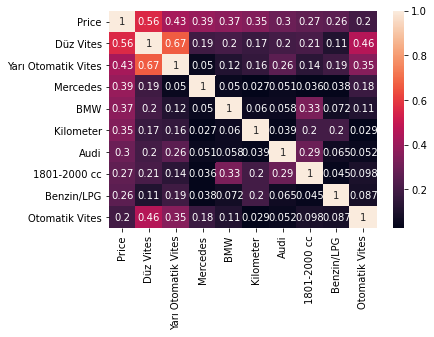

In [431]:
sns.heatmap(df4[df4_reduced].corr().abs(),annot=True)

<AxesSubplot:>

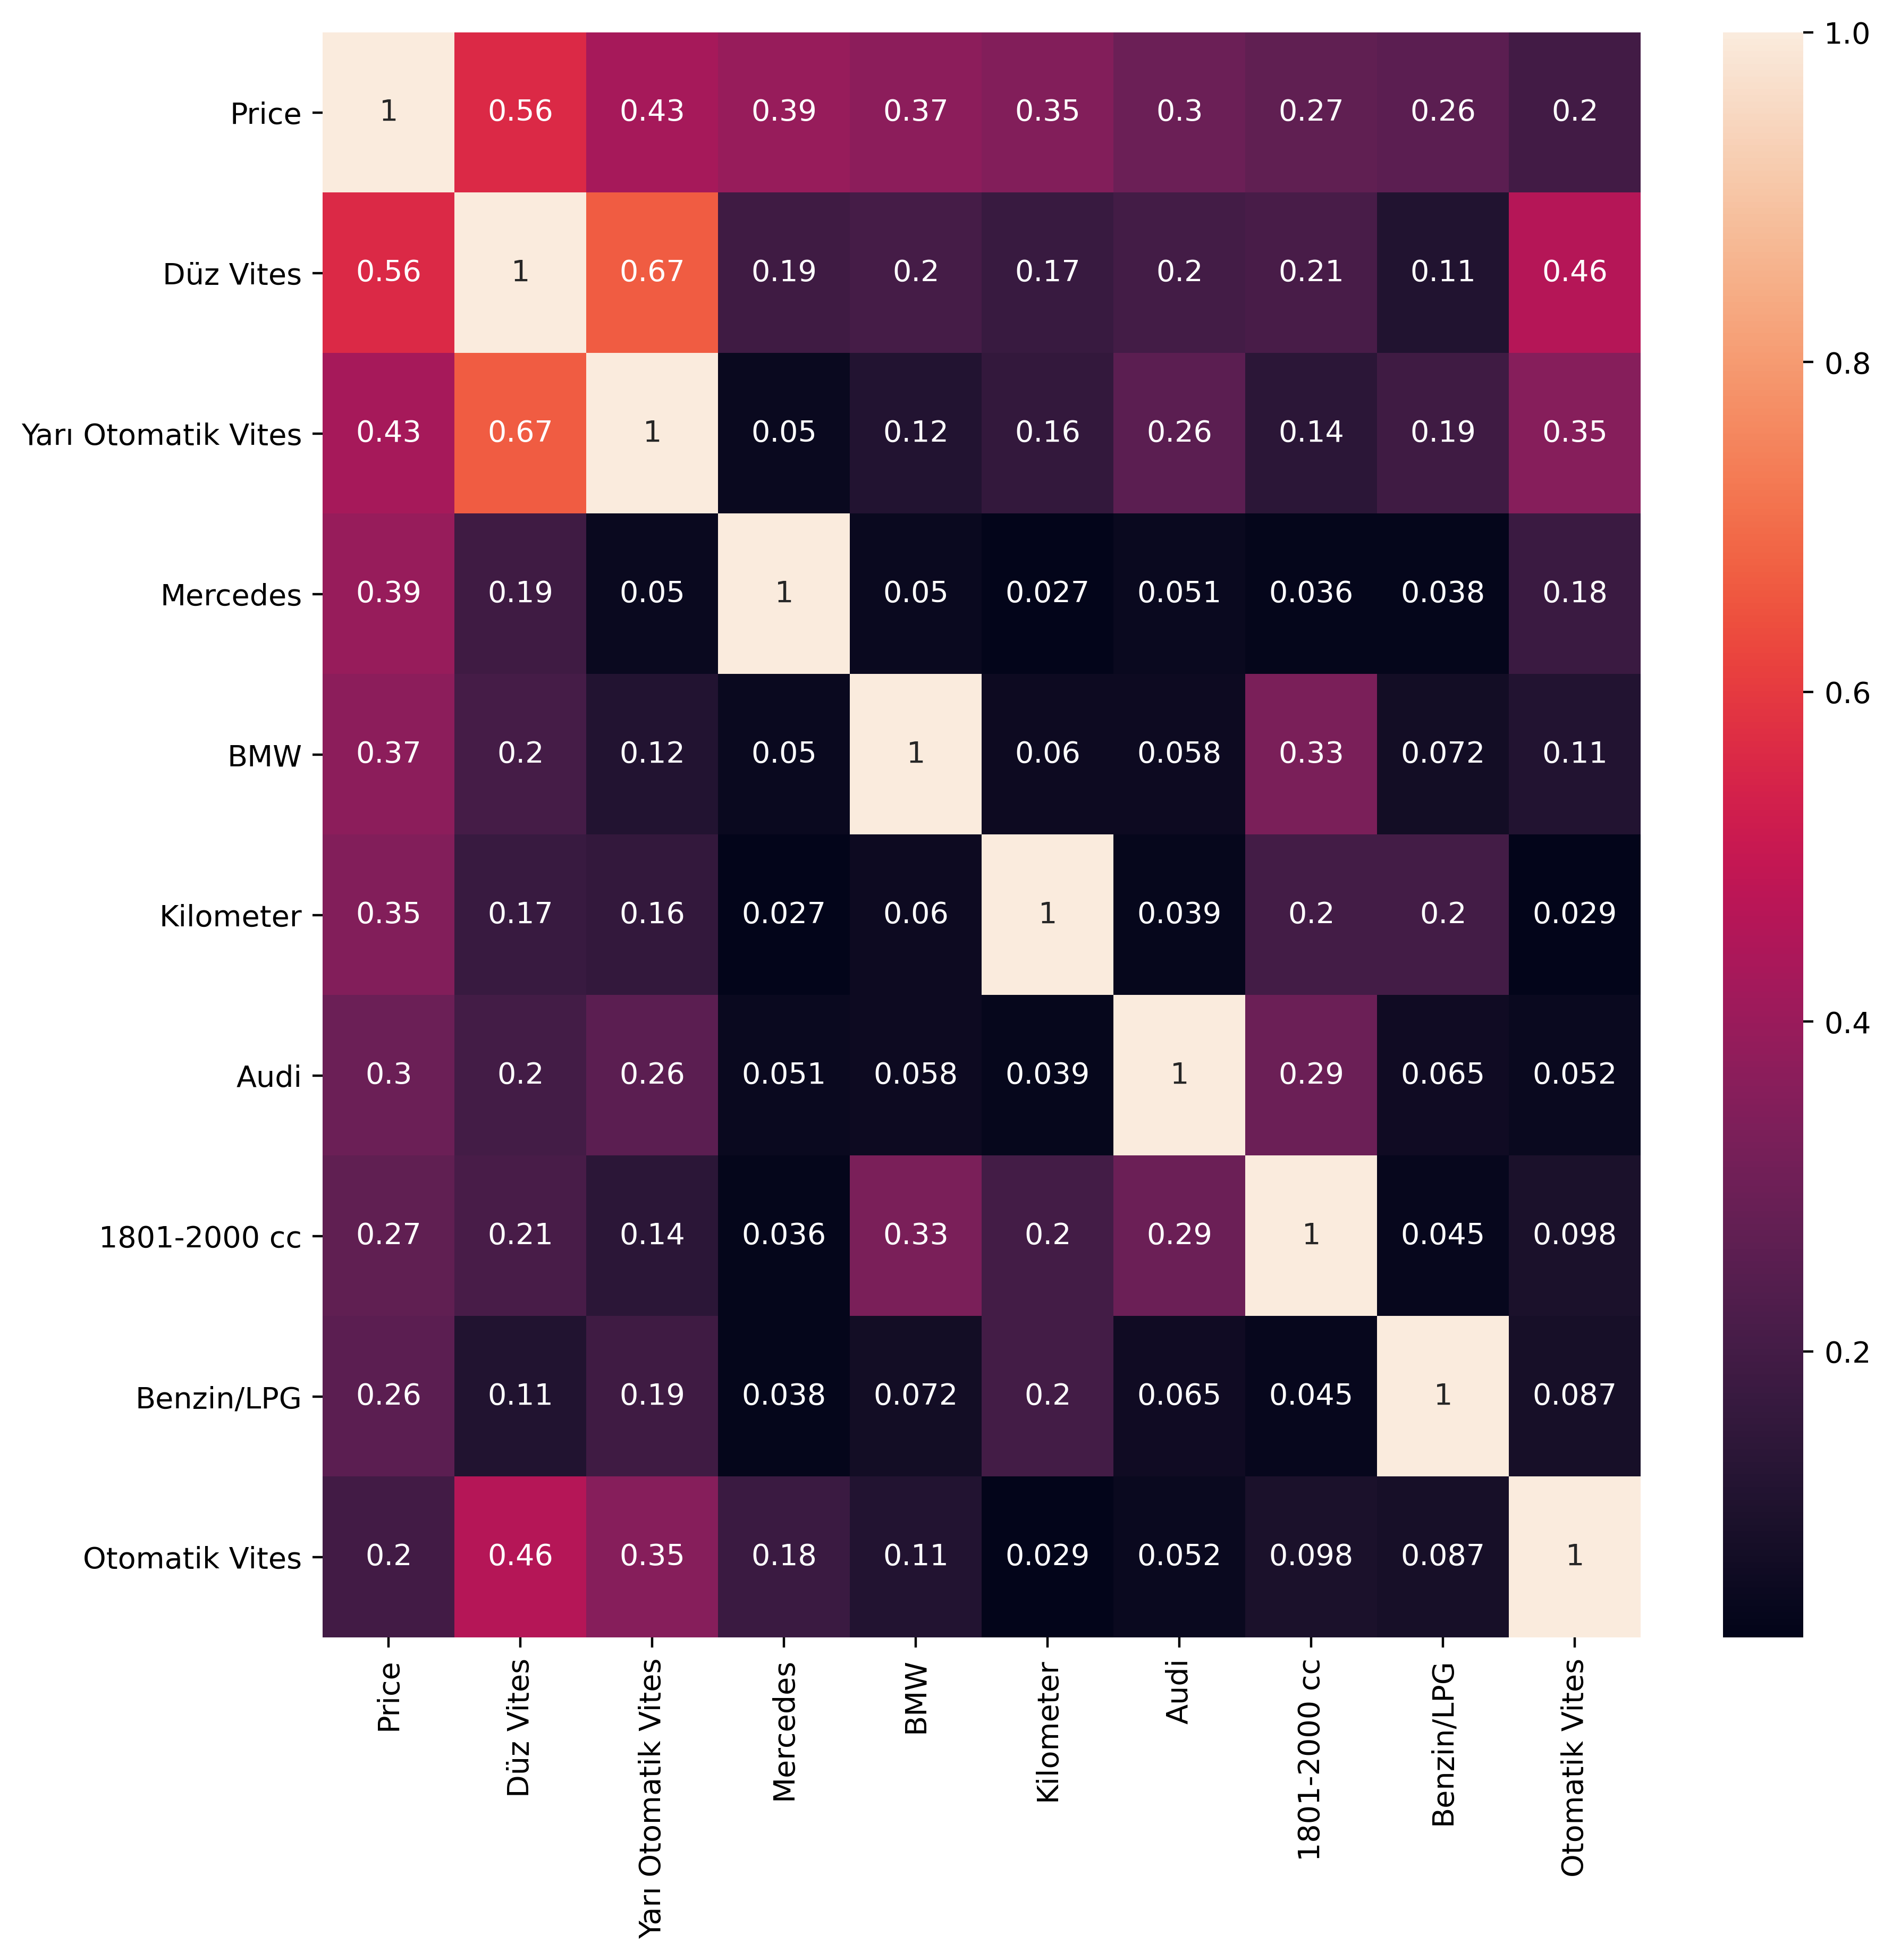

In [432]:
plt.figure(figsize=(10,10), dpi=400)
sns.heatmap(df4[df4_reduced].corr().abs(),annot=True)